 <h1 align="center">Анализ рынка стартапов</h1> 

Автор: Стукалов Артем Витальевич  
Дата: 28.12.2025

## <a id="content">Содержание:</a>

[Введение в проект](#introduction)  
[Часть 1. Знакомство с данными: загрузка и предобработка](#part1)  
&nbsp;&nbsp;&nbsp;&nbsp;[1.1. Вывод общей информации](#part1.1)  
&nbsp;&nbsp;&nbsp;&nbsp;[1.2. Предобработка данных](#part1.2)  
&nbsp;&nbsp;&nbsp;&nbsp;[Вывод по знакомству с данными: загрузке и предобработке](#conslusion1)  
[Часть 2. Инжиниринг признаков](#part2)  
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Группы по срокам финансирования](#part2.1)   
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Выделение средних и нишевых сегментов рынка](#part2.2)  
[Часть 3. Работа с выбросами и анализ](#part3)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.1. Анализируем и помечаем выбросы в каждом из сегментов](#part3.1)   
&nbsp;&nbsp;&nbsp;&nbsp;[3.2. Определяем границы рассматриваемого периода, отбрасываем аномалии](#part3.2)  
&nbsp;&nbsp;&nbsp;&nbsp;[3.3. Анализ типов финансирования по объёму и популярности](#part3.3)  
[Часть 4. Анализ динамики](#part4)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.1. Динамика предоставления финансирования по годам](#part4.1)   
&nbsp;&nbsp;&nbsp;&nbsp;[4.2. Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов](#part4.2)  
&nbsp;&nbsp;&nbsp;&nbsp;[4.3. Годовая динамика доли возвращённых средств по типам финансирования](#part4.3)  
[Итоговый вывод и рекомендации](#common_conclusion)

## <a id='introduction'>Введение в проект</a>

### Цель и задачи
**Цель проекта** - исследовать закономерности финансирования стартапов и оценить перспективы выхода на рынок с покупкой и развитием компаний.

**Задачи проекта:**
- подготовить датасет к работе,
- исследовать динамику и структуру финансирования стартапов
- ответить на вопросы, важные для оценки инвестиционных стратегий.

### Описание данных

Данные состоят из двух датасетов:
- cb_investments.csv — информация о компаниях и состоявшемся финансировании;  
- cb_returns.csv — информацию об объёмах возвратов по годам и типам финансирования в миллионах долларов.

#### Описание датасета cb_investments

**Таблица cb_investments**  
Содержит информацию о компаниях и состоявшемся финансировании:
- name — название компании;
- homepage_url — ссылка на сайт компании;
- category_list — категории, в которых работает компания. Указываются через |;
- market — основной рынок или отрасль компании;
- funding_total_usd — общий объём привлечённых инвестиций в долларах США;
- status — текущий статус компании, например, operating, closed и так далее;
- country_code — код страны, например USA;
- state_code — код штата или региона, например CA;
- region — регион, например SF Bay Area;
- city — город, в котором расположена компания;
- funding_rounds — общее число раундов финансирования;
- participants — число участников в раундах финансирования;
- founded_at — дата основания компании;
- founded_month — месяц основания в формате YYYY-MM;
- founded_quarter — квартал основания в формате YYYY-QN;
- founded_year — год основания;
- first_funding_at — дата первого финансирования;
- mid_funding_at — дата среднего по времени раунда финансирования;
- last_funding_at — дата последнего финансирования;
- seed — сумма инвестиций на посевной стадии;
- venture — сумма венчурных инвестиций;
- equity_crowdfunding — сумма, привлечённая через долевой краудфандинг;
- undisclosed — сумма финансирования нераскрытого типа;
- convertible_note — сумма инвестиций через конвертируемые займы;
- debt_financing — сумма долгового финансирования;
- angel — сумма инвестиций от бизнес-ангелов;
- grant — сумма полученных грантов;
- private_equity — сумма инвестиций в виде прямых (частных) вложений;
- post_ipo_equity — сумма финансирования после IPO;
- post_ipo_debt — сумма долгового финансирования после IPO;
- secondary_market — сумма сделок на вторичном рынке;
- product_crowdfunding — сумма, привлечённая через продуктовый краудфандинг;
- round_A — round_H — сумма инвестиций в соответствующем раунде.

#### Описание датасета cb_returns

**Таблица cb_returns**  
Содержит информацию об объёмах возвратов по годам и типам финансирования в миллионах долларов:
- year — год возврата средств;
- seed — сумма возвратов от посевных инвестиций;
- venture — сумма возвратов от венчурных инвестиций;
- equity_crowdfunding — сумма, возвращённая по долевому краудфандингу;
- undisclosed — сумма возвратов нераскрытого типа;
- convertible_note — сумма возвратов через конвертируемые займы;
- debt_financing — сумма возвратов от долгового финансирования;
- angel — сумма возвратов бизнес-ангелам;
- grant — сумма возвратов по грантам;
- private_equity — сумма возвратов прямых (частных) вложений;
- post_ipo_equity — сумма возвратов от IPO;
- post_ipo_debt — сумма возвратов от долгового IPO;
- secondary_market — сумма возвратов от сделок на вторичном рынке;
- product_crowdfunding — сумма возвратов по продуктовому краудфандингу.

## <a id='part1'>Часть 1. Знакомство с данными: загрузка и предобработка</a>

### <a id='part1.1'>1.1. Вывод общей информации</a>

[Вернуться к содержанию](#content)

#### Задачи:
- Загрузить необходимые для работы библиотеки
- Загрузить все данные по проекту.
- Вывести информацию, которая необходима для принятия решений о предобработке.
- Сделать вывод о полученных данных: каков их объём, соответствуют ли данные описанию, есть ли пропущенные значения, используются ли верные типы данных. 
- Отметить другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Импортируем основные библиотеки для дальнейшего анализа данных

In [ ]:
import pandas as pd # Импортируем библиотеку pandas

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

Сохраним данные датасетов в двух переменных: cb_investments и cb_returns.

In [2]:
# Выгружаем данные в переменные cb_investments и cb_returns
cb_investments = pd.read_csv('cb_investments.csv', sep=';', low_memory=False) # Выгружаем данные из датасета cb_investmets.csv
cb_returns = pd.read_csv('cb_returns.csv') # Выгружаем данные из датасета cb_returnse.csv

#### cb_investments

Познакомимся с данными датасета cb_investments - выведем первые строки методом head() и посмотрим основную информацию о датасете методом info().

In [3]:
# Выводим первые строки датасета
pd.set_option('display.max_columns', 500)
cb_investments.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,1.0,NaN,1636-09-08,NaN,NaN,1636.0,2014-01-06,NaN,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,1.0,NaN,1785-01-01,NaN,NaN,1785.0,2014-05-15,NaN,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,1.0,1.0,1802-07-19,NaN,NaN,1802.0,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,3.0,0.0,1817-01-01,NaN,NaN,1817.0,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,1.0,NaN,1826-01-01,NaN,NaN,1826.0,2014-01-14,NaN,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Выводим основную информацию датасета
cb_investments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

Посчитаем общее количество пропусков в датасете cb_investments

In [5]:
# Считаем общее количество пропусков
total_empty_spaces_cb_investments = cb_investments.isna().sum().sum()
print(f'Общее количество пропусков в датасете cb_investments: {total_empty_spaces_cb_investments}')

Общее количество пропусков в датасете cb_investments: 324660


In [6]:
# создаем копию датасета до преобразования для возможности проверить сделанные изменения после предобработки
initial_rows_count = cb_investments.copy()
print(f'Общее количество строк: {len(initial_rows_count)}')

Общее количество строк: 54294


In [7]:
print(cb_investments.dtypes)

name                     object
homepage_url             object
category_list            object
 market                  object
 funding_total_usd       object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
participants            float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
mid_funding_at           object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_

#### После первичного анализа датасета cb_investments можно сделать следующие выводы:
- Датасет cb_investments содержит 40 столбцов и 54294 строк, в которых представлена информация о среднем чеке в заведениях общественного питания
- Датасет cb_investments содержит следующие типы данных для каждого столбца:
  - 24 числовых столбца (float64) - в основном показатели финансирования и флаги
  - 16 столбцов-объектов - строковые данные, включая даты
- Общее количество пропусков: 324660, что указывает на значительную проблему с неполнотой данных
- Не все названия столбцов представлены в едином регистре и соответствуют стилю snake case
- Значения в столбцах приведены не в едином регистре, что нужно исправить
- Присутствуют ошибки в типе данных, например: funding_total_usd необходимо привести в числовой формат
- Необходимо преобразовать даты из строкового формата в datetime.

#### cb_returns

Познакомимся с данными датасета cb_returns - выведем первые строки методом head() и посмотрим основную информацию о датасете методом info().

In [8]:
# Выводим первые строки датасета
cb_returns.head()

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
3,2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
4,2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


In [9]:
# Выводим основную информацию датасета
cb_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


Посчитаем общее количество пропусков в датасете cb_returns

In [10]:
# Считаем общее количество пропусков
total_empty_spaces_cb_returns = cb_returns.isna().sum().sum()
print(f'Общее количество пропусков в датасете cb_investments: {total_empty_spaces_cb_returns}')

Общее количество пропусков в датасете cb_investments: 0


In [11]:
print(cb_returns.dtypes)

year                      int64
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
dtype: object


#### После первичного анализа датасета cb_returns можно сделать следующие выводы:
- Датасет cb_returns содержит 15 строк и 14 столбцов.
- Значения в столбцах соответствуют своему описанию
- Названия столбцов представлены в едином стиле и соответствуют стилю snake case.
- Датафрейм rest_info.csv содержит следующие типы данных для каждого столбца:
  - 1 числовой столбец (int64): year
  - 13 числовых столбца (float64): seed,	venture,	equity_crowdfunding,	undisclosed	convertible_note,	debt_financing,	angel,	grant,	private_equity,	post_ipo_equity,	post_ipo_debt,	secondary_market,	product_crowdfunding
- В датасете cb_returns отсутствуют пропущенные значения.

### <a id='part1.2'>1.2. Предобработка данных</a>

[Вернуться к содержанию](#content)

#### Задачи:
- Проверка названий столбцов в датасетах
- Изучение корректности типов данных
  - Приведение столбца 'funding_total_usd' к числовому типу.
  - Обработка типов данных в столбцах, которые хранят значения даты и времени.
- Установление столбца 'year' в качестве индекса датасета cb_returns.
- Очистка данных:
  - Обработка пропусков в текстовых столбцах с помощью заглушек там, где это понадобится.
  - Обработка полных дубликатов в данных и пропусков в столбце 'funding_total_usd'.
  - Очистка данных от тех строк, которые не несут какой-либо информации либо не содержат данных о финансировании.
  - Заполнение пропусков в столбце 'mid_funding_at' на основании значений в столбцах 'first_funding_at' и 'last_funding_at'.
- Оценить полноту данных и сделать предварительный вывод о том, достаточно ли данных для решения задач проекта. 

#### Проверка названий столбцов в датасетах

Создадим новую переменную 'cb_investments_clean' и ' cb_returns_clean', в которой будем делать предобработку данных, а именно: приведение к нужному типу данных, очищение данных от пропусков и дубликатов.

In [12]:
cb_investments_clean = cb_investments.copy() # создаем копию переменной cb_investments и записываем ее в переменную 'cb_investments_clean'
cb_returns_clean = cb_returns.copy() # создаем копию переменной cb_returns и записываем ее в переменную 'cb_returns_clean'

Выведем название столбцов датасета cb_investments_clean и cb_returns_clean.

In [13]:
# Выводим название столбцов cb_investments
cb_investments_clean.columns

Index(['name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [14]:
# Выводим название столбцов cb_returns_clean
cb_returns_clean.columns

Index(['year', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding'],
      dtype='object')

Можно увидеть, что в названии столбцов датасета cb_investments_clean присутствует верхний регистр и пробелы между словами, а именно:
- В столбцах 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H' есть заглавные буквы;
- В столбцах 'market', 'funding_total_usd' присутствует пробелы.  

С целью это исправить приведем наименования столбцов датасета cb_investments_clean к нижнему регистру и избавимся от пробелов в наименовании столбцов.

In [15]:
# Приводим наименования столбцов cb_investments_clean к нижнему регистру
cb_investments_clean.columns = cb_investments_clean.columns.str.strip().str.lower()

# Проверяем результат
cb_investments_clean.columns

Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_a', 'round_b',
       'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h'],
      dtype='object')

Таким образом, наименования столбцов cb_investments_clean и cb_returns_clean представлены в едином нижнем регистре и без лишних пробелов.

#### Изучение корректности типов данных

#### Приведение столбца 'funding_total_usd' к числовому типу.

Выводим типы данных датасетов 'cb_investments_clean'.

In [16]:
print(cb_investments_clean.dtypes) # выводим типы данных датасета 'cb_investments_clean'

name                     object
homepage_url             object
category_list            object
market                   object
funding_total_usd        object
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
participants            float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
mid_funding_at           object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_

In [17]:
# Выводим первые строки датасета cb_investments
pd.set_option('display.max_columns', 500)
cb_investments_clean.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,1.0,NaN,1636-09-08,NaN,NaN,1636.0,2014-01-06,NaN,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,1.0,NaN,1785-01-01,NaN,NaN,1785.0,2014-05-15,NaN,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,1.0,1.0,1802-07-19,NaN,NaN,1802.0,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,3.0,0.0,1817-01-01,NaN,NaN,1817.0,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,1.0,NaN,1826-01-01,NaN,NaN,1826.0,2014-01-14,NaN,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Как можно увидеть столбец 'funding_total_usd' содержит числовой тип данных, а именно: общий объём привлечённых инвестиций в долларах США. Между тем, несмотря на то что вышеуказанный столбец содержит числовой значение, в текущем датасете он представлен как тип данных object. Вероятно причиной этому является содержание других нецифровых символов, а именно: запятых, делящих число на разряды, т.е. их нужно удалить.

In [18]:
# Удаляем запятые и пробелы
cb_investments_clean['funding_total_usd'] = cb_investments_clean['funding_total_usd'].str.replace(',', '')

Теперь преобразуем данные столбца 'funding_total_usd' в числовой тип (integer).

In [19]:
# Преобразуем данные столбца 'funding_total_usd' в числовой тип (integer)
cb_investments_clean['funding_total_usd'] = pd.to_numeric(
    cb_investments_clean['funding_total_usd'],
    downcast='float',
    errors='coerce'
)

Проверим результат.

In [20]:
# Выводим типы данных датасета cb_investments_clean
print(cb_investments_clean.dtypes)

name                     object
homepage_url             object
category_list            object
market                   object
funding_total_usd       float64
status                   object
country_code             object
state_code               object
region                   object
city                     object
funding_rounds          float64
participants            float64
founded_at               object
founded_month            object
founded_quarter          object
founded_year            float64
first_funding_at         object
mid_funding_at           object
last_funding_at          object
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_

In [21]:
# Выводим первые строки датасета cb_investments
pd.set_option('display.max_columns', 500)
cb_investments_clean.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
0,Harvard University,http://harvard.edu,|Education|,Education,90000000.0,operating,USA,MA,Boston,Cambridge,1.0,NaN,1636-09-08,NaN,NaN,1636.0,2014-01-06,NaN,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,2000000.0,operating,NaN,NaN,NaN,NaN,1.0,NaN,1785-01-01,NaN,NaN,1785.0,2014-05-15,NaN,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,9000000.0,operating,USA,DE,"Wilmington, Delaware",Wilmington,1.0,1.0,1802-07-19,NaN,NaN,1802.0,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,7700000.0,operating,USA,MI,Detroit,Ann Arbor,3.0,0.0,1817-01-01,NaN,NaN,1817.0,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,540000.0,operating,USA,OH,Cleveland,Cleveland,1.0,NaN,1826-01-01,NaN,NaN,1826.0,2014-01-14,NaN,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Таким образом, столбец 'funding_total_usd' был обработан (были удалены запятые и пробелы) и приведен к нужному типу данных с object к float

#### Обработка типов данных в столбцах, которые хранят значения даты и времени

Необходимо привести типы данных в столбцах, которые хранят значения даты в тип данных datetime, а именно в следующих столбцах:
- 'founded_at'
- 'first_funding_at'
- 'mid_funding_at'
- 'last_funding_at'

In [22]:
# Список столбцов с датами, которые нужно преобразовать
date_columns = ['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']

In [23]:
# Преобразуем каждый столбец в datetime
for column in date_columns:
    cb_investments_clean[column] = pd.to_datetime(
        cb_investments_clean[column], 
        format='%Y-%m-%d',
        errors='coerce')

Столбцы 'founded_month' и 'founded_quarter' лучше не преобразовывать, а оставить как есть типом данных object по следующим причинам:
- 'founded_month' (месяц основания в формате YYYY-MM) в себе содержит не дату, а период
- founded_quarter (квартал основания в формате YYYY-QN) при преобразовании в квартал теряется сам квартал

Теперь изменим тип данных в столбцах, которые должны иметь числовой тип данных, а именно:
- funding_rounds (общее число раундов финансирования) - должен иметь тип данных integer, а не float, поскольку содержит целочисленные значения
- participants (число участников в раундах финансирования) - должен иметь тип данных integer, а не float, поскольку число участников не может быть дробным
- founded_year (год основания) - должен иметь тип данных integer, а не float, поскольку год основания не может быть дробным значением

In [24]:
#  Приводим столбцы 'funding_rounds', 'participants', 'founded_year' к типу данных integer
for column in cb_investments_clean[['funding_rounds', 'participants', 'founded_year']]:
    cb_investments_clean[column] = pd.to_numeric(
        cb_investments_clean[column], 
        errors='coerce').astype('Int64')

In [25]:
# Проверяем результат
print(cb_investments_clean.dtypes)

name                            object
homepage_url                    object
category_list                   object
market                          object
funding_total_usd              float64
status                          object
country_code                    object
state_code                      object
region                          object
city                            object
funding_rounds                   Int64
participants                     Int64
founded_at              datetime64[ns]
founded_month                   object
founded_quarter                 object
founded_year                     Int64
first_funding_at        datetime64[ns]
mid_funding_at          datetime64[ns]
last_funding_at         datetime64[ns]
seed                           float64
venture                        float64
equity_crowdfunding            float64
undisclosed                    float64
convertible_note               float64
debt_financing                 float64
angel                    

In [26]:
# Выводим первые строки датасета cb_investments
pd.set_option('display.max_columns', 500)
cb_investments_clean.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
0,Harvard University,http://harvard.edu,|Education|,Education,90000000.0,operating,USA,MA,Boston,Cambridge,1,<NA>,NaT,NaN,NaN,1636,2014-01-06,NaT,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,2000000.0,operating,NaN,NaN,NaN,NaN,1,<NA>,1785-01-01,NaN,NaN,1785,2014-05-15,NaT,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,9000000.0,operating,USA,DE,"Wilmington, Delaware",Wilmington,1,1,1802-07-19,NaN,NaN,1802,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,7700000.0,operating,USA,MI,Detroit,Ann Arbor,3,0,1817-01-01,NaN,NaN,1817,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,540000.0,operating,USA,OH,Cleveland,Cleveland,1,<NA>,1826-01-01,NaN,NaN,1826,2014-01-14,NaT,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Таким образом, было сделано следующее:
- Столбцы 'founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at' приведены в тип данных datetime,
- Столбцы 'founded_month' и 'founded_quarter' оставлены без изменения типом данных object по следующим причинам:
  - 'founded_month' (месяц основания в формате YYYY-MM) в себе содержит не дату, а период
  - founded_quarter (квартал основания в формате YYYY-QN) при преобразовании в квартал теряется сам квартал
- Столбцы 'funding_rounds', 'participants', 'founded_year' приведены к целочисленному типу данных integer

#### Установление столбца 'year' в качестве индекса датасета cb_returns

In [27]:
print(cb_returns.dtypes) # выводим типы данных датасета 'cb_returns_clean'

year                      int64
seed                    float64
venture                 float64
equity_crowdfunding     float64
undisclosed             float64
convertible_note        float64
debt_financing          float64
angel                   float64
grant                   float64
private_equity          float64
post_ipo_equity         float64
post_ipo_debt           float64
secondary_market        float64
product_crowdfunding    float64
dtype: object


In [28]:
# Выводим первые строки датасета
cb_returns_clean.head()

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
3,2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
4,2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


In [29]:
#  Делаем столбец 'year' индексом датасета cb_returns_clean
cb_returns_clean = cb_returns_clean.set_index('year')

In [30]:
# Проверим изменения
cb_returns_clean.head()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


Таким образом, столбец 'year' стал индексом датасета cb_returns.

#### Очистка данных.

#### Обработка пропусков в текстовых столбцах с помощью заглушек там, где это понадобится.

Текстовые данные присутствуют только в датасете cb_investments_clean

In [31]:
# Выводим типы данных в датасете cb_investments_clean
print(cb_investments_clean.dtypes)

name                            object
homepage_url                    object
category_list                   object
market                          object
funding_total_usd              float64
status                          object
country_code                    object
state_code                      object
region                          object
city                            object
funding_rounds                   Int64
participants                     Int64
founded_at              datetime64[ns]
founded_month                   object
founded_quarter                 object
founded_year                     Int64
first_funding_at        datetime64[ns]
mid_funding_at          datetime64[ns]
last_funding_at         datetime64[ns]
seed                           float64
venture                        float64
equity_crowdfunding            float64
undisclosed                    float64
convertible_note               float64
debt_financing                 float64
angel                    

Как можно увидеть текстовый тип данных, т.е. тип данных object присутствует в следующих столбцах датасета cb_investments_clean: 'name', 'homepage_url', 'category_list', 'market', 'status', 'country_code', 'state_code', 'region', 'city'.

Узнаем количество пропусков в вышеуказанных столбцах в процентном соотношении.

In [32]:
# Столбцы, которые необходимо проверить
columns_with_spaces = ['name', 'homepage_url', 'category_list', 'market', 'status', 
                    'country_code', 'state_code', 'region', 'city']

# Подсчитываем процент пропусков в столбцах
(cb_investments_clean[columns_with_spaces].isna().sum() / len(cb_investments_clean) * 100).sort_values(ascending=False)

state_code       44.448742
city             20.208494
region           18.655837
country_code     18.655837
market           16.239363
category_list    16.239363
homepage_url     15.296350
status           11.364055
name              8.945740
dtype: float64

Заполним пропуски в столбцах 'name', 'homepage_url', 'category_list', 'market', 'status', 'country_code', 'state_code', 'region', 'city' заглушками.

In [33]:
# Определяем текстовые столбцы
columns_with_spaces = ['name', 'homepage_url', 'category_list', 'market', 
                'status', 'country_code', 'state_code', 'region', 'city']

# Заполняем пропуски заглушками
for column in columns_with_spaces:
    cb_investments_clean[column] = cb_investments_clean[column].fillna('unknown')

In [34]:
# Проверим результат
columns_with_spaces = ['name', 'homepage_url', 'category_list', 'market', 'status', 
                    'country_code', 'state_code', 'region', 'city']

# Подсчитываем процент пропусков в столбцах
(cb_investments_clean[columns_with_spaces].isna().sum() / len(cb_investments_clean) * 100).sort_values(ascending=False)

name             0.0
homepage_url     0.0
category_list    0.0
market           0.0
status           0.0
country_code     0.0
state_code       0.0
region           0.0
city             0.0
dtype: float64

Таким образом, пропуски в столбцах с текстовыми данными, с типом данных object, а именно: 'name', 'homepage_url', 'category_list', 'market', 'status', 'country_code', 'state_code', 'region', 'city' были заполнены значением-индикатором 'unknown'.

#### Обработка полных дубликатов в данных и пропусков в столбце 'funding_total_usd'.

Посчитаем количество пропусков в столбце  'funding_total_usd'.

In [35]:
# Подсчитываем процент пропусков в столбцах
funding_total_usd_spaces=cb_investments_clean['funding_total_usd'].isna().mean()*100
print(f"Количество пропусков в столбце 'funding_total_usd': {funding_total_usd_spaces}%")

Количество пропусков в столбце 'funding_total_usd': 24.656499797399345%


Учитывая, что 24.65% данных в funding_total_usd пропущены, заполнение нулями или медианой может исказить анализ. Заполнение пропусков медианой по группам также создаст синтетические данные и исказит анализ. В таком случае, допустимая замена пропусков заглушками (значением-индикатором). Только при анализе заглушки надо будет отфильтровывать.  
Но надо иметь в виду, что правильно построить матрицу корреляции по столбцам с заглушками не удастся, так как заглушки искажают анализ, а при фильтрации заглушки в одном столбце теряются значимые данные в других столбцах. В таком случае, верным решением будет оставить столбец 'funding_total_usd' как есть.

Проверим данные на наличие явных (полных) дубликатов.

In [36]:
# Проверяем явные (полные) дубликаты в датасете cb_investments_clean
cb_investments_clean_duplicates_count = cb_investments_clean.duplicated().sum()
print(f"Количество полных дубликатов в датасете cb_investments_clean: {cb_investments_clean_duplicates_count}")

Количество полных дубликатов в датасете cb_investments_clean: 4855


In [37]:
# Проверяем явные (полные) дубликаты в датасете cb_returns_clean
cb_returns_clean_duplicates_count = cb_returns_clean.duplicated().sum()
print(f"Количество полных дубликатов в датасете cb_returns_clean: {cb_returns_clean_duplicates_count}")

Количество полных дубликатов в датасете cb_returns_clean: 0


In [38]:
# Проверка явных (полных) дубликатов
duplicates = cb_investments_clean[cb_investments_clean.duplicated(keep=False)]
print(f"Найдено {len(duplicates)} дублированных строк")
duplicates.head()

Найдено 4856 дублированных строк


,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
49438,unknown,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,<NA>,<NA>,NaT,NaN,NaN,<NA>,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49439,unknown,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,<NA>,<NA>,NaT,NaN,NaN,<NA>,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49440,unknown,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,<NA>,<NA>,NaT,NaN,NaN,<NA>,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49441,unknown,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,<NA>,<NA>,NaT,NaN,NaN,<NA>,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49442,unknown,unknown,unknown,unknown,NaN,unknown,unknown,unknown,unknown,unknown,<NA>,<NA>,NaT,NaN,NaN,<NA>,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Таким образом, из результатов проверки датасета на явные (полные) дубликаты видно, что в датасете cb_investments_clean присутствуют явные (полные) дубликаты в количестве: 4855.

В начале приведем значения столбцов к единому нижнему регистру.

In [39]:
# Выводим первые строки датасета cb_investments
pd.set_option('display.max_columns', 500)
cb_investments_clean.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
0,Harvard University,http://harvard.edu,|Education|,Education,90000000.0,operating,USA,MA,Boston,Cambridge,1,<NA>,NaT,NaN,NaN,1636,2014-01-06,NaT,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,unknown,unknown,2000000.0,operating,unknown,unknown,unknown,unknown,1,<NA>,1785-01-01,NaN,NaN,1785,2014-05-15,NaT,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,9000000.0,operating,USA,DE,"Wilmington, Delaware",Wilmington,1,1,1802-07-19,NaN,NaN,1802,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,7700000.0,operating,USA,MI,Detroit,Ann Arbor,3,0,1817-01-01,NaN,NaN,1817,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,540000.0,operating,USA,OH,Cleveland,Cleveland,1,<NA>,1826-01-01,NaN,NaN,1826,2014-01-14,NaT,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# Список текстовых столбцов, которые нужно преобразовать
columns_to_lower = ['name', 'homepage_url', 'category_list', 'market', 
                    'status', 'country_code', 'state_code', 'region', 'city', 
                    'founded_quarter']

# цикл для приведений строк к нижнему регистру
for column in columns_to_lower:
    cb_investments_clean[column] = cb_investments_clean[column].str.lower()

In [41]:
# Удаление полных дубликатов
cb_investments_clean = cb_investments_clean.drop_duplicates()

# Проверяем явные (полные) дубликаты в датасете cb_investments_clean
duplicates_count = cb_investments_clean.duplicated().sum()
print(f"Количество полных дубликатов в датасете cb_investments_clean: {duplicates_count}")

Количество полных дубликатов в датасете cb_investments_clean: 0


Таким образом, в датасете cb_investments_clean было сделано следующее:
- Были обработаны полные (явные) дубликаты в количестве 4855 дубликатов.
- Значения столбцов датасета cb_investments_clean, содержащих тип данных object были приведены к единому нижнему регистру
- Пропуски в столбце 'funding_total_usd' в количестве 24.66%  остались не обработаны по следующим причинам:
  - Заполнение пропусков нулями или медианой может исказить анализ.
  - Заполнение пропусков медианой по группам также создаст синтетические данные и исказит анализ.
  - Заполнение пропусков заглушками искажают анализ также дает временный эффект, поскольку при анализе данных с ними их надо будет отфильтровывать. Кроме того, заглушки искажают анализ, а при фильтрации заглушки в одном столбце теряются значимые данные в других столбцах.

#### Очистка данных от тех строк, которые не несут какой-либо информации либо не содержат данных о финансировании.

Удалим строки, которые не несут какой-либо информации или не содержат данных о финансировании, а именно:
- Строки, в которых нет существенной, важной информации для анализа, т.е. наименовании компании
- Строки без данных о финансировании

Выведем общее количество пропусков в датасете cb_investments_clean.

In [42]:
# Выводим процентное количество пропусков в каждом из столбцов датасета cb_investments_clean
cb_investments_clean.isna().mean().sort_values(ascending=False)*100

mid_funding_at          38.736625
participants            38.362426
founded_month           22.162665
founded_quarter         22.162665
founded_at              22.019054
founded_year            22.017031
funding_total_usd       17.257631
first_funding_at         0.022250
last_funding_at          0.014159
round_a                  0.002023
grant                    0.002023
round_b                  0.002023
post_ipo_equity          0.002023
post_ipo_debt            0.002023
secondary_market         0.002023
private_equity           0.002023
venture                  0.002023
equity_crowdfunding      0.002023
funding_rounds           0.002023
seed                     0.002023
undisclosed              0.002023
convertible_note         0.002023
angel                    0.002023
debt_financing           0.002023
round_e                  0.002023
round_f                  0.002023
round_c                  0.002023
round_d                  0.002023
round_g                  0.002023
round_h       

С учетом того, что мы уже удаляли полные дубликаты, а также того, что пропуски в столбце 'name' были заменены на значение-индикатор 'unknown', посчитаем количество строк в столбце 'name', в которых встречается 'unknown'.

In [43]:
# Считаем количество строк в столбце 'name', в которых встречается 'unknown'
unknown_name_count = cb_investments_clean['name'] == 'unknown'
print(f"Количество строк в столбце 'name' с названием 'unknown': {unknown_name_count.sum()}")

# Создаем копию датасета cb_investments_clean в переменной initial_count_before_remove
cb_investments_clean_copy = cb_investments_clean.copy()
# Считаем общее количество строк
initial_count_before_remove = len(cb_investments_clean_copy)
print(f"Количество строк до их очистки (удаления): {initial_count_before_remove}")

Количество строк в столбце 'name' с названием 'unknown': 2
Количество строк до их очистки (удаления): 49439


Теперь заменим строки в столбце 'name', в которых встречается 'unknown', на NaN, с целью их удаления с помощью dropna.

In [44]:
# Заменяем 'unknown' на NaN в столбце 'name'
cb_investments_clean['name'] = cb_investments_clean['name'].replace('unknown', pd.NA)

# Удаляем строки с NaN в столбце 'name' с помощью dropna
cb_investments_clean = cb_investments_clean.dropna(subset=['name'])
removed_name = initial_count_before_remove - len(cb_investments_clean)

print(f"Удалено строк с отсутствующим названием (NaN): {removed_name}")
print(f"Осталось строк: {len(cb_investments_clean)}")

Удалено строк с отсутствующим названием (NaN): 2
Осталось строк: 49437


Посмотрим количество пропусков в столбцах с инвестициями.

In [45]:
# Выводим количество пропусков
cb_investments_clean.isna().sum().sort_values(ascending=False)

mid_funding_at          19149
participants            18964
founded_month           10956
founded_quarter         10956
founded_at              10885
founded_year            10884
funding_total_usd        8531
first_funding_at           10
last_funding_at             6
state_code                  0
status                      0
country_code                0
homepage_url                0
category_list               0
name                        0
market                      0
city                        0
region                      0
funding_rounds              0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_a                     0
round_b   

Теперь удалим строки с пропусками в столбце 'funding_total_usd', поскольку в нем наименьшее количество пропусков из всех столбцов, которые содержат финансовые показатели.

Также удалим пропуски в столбцах 'first_funding_at' и 'last_funding_at' из-за их небольшого количества.

In [46]:
# Сохраняем в переменную столбцы, в которых нужно удалить пропуски
columns_for_removing=['funding_total_usd', 'first_funding_at', 'last_funding_at']

# Удаляем пропуски в столбцах 'funding_total_usd', 'first_funding_at' и 'last_funding_at
cb_investments_clean = cb_investments_clean.dropna(subset=columns_for_removing)

Проверим результат.

In [47]:
# Выводим количество пропусков
cb_investments_clean.isna().sum().sort_values(ascending=False)

mid_funding_at          13674
participants            13574
founded_month            8772
founded_quarter          8772
founded_at               8707
founded_year             8706
name                        0
homepage_url                0
state_code                  0
country_code                0
status                      0
funding_total_usd           0
market                      0
category_list               0
region                      0
funding_rounds              0
city                        0
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       0
private_equity              0
post_ipo_equity             0
post_ipo_debt               0
secondary_market            0
product_crowdfunding        0
round_a                     0
round_b   

In [48]:
# Считаем общее количество строк
remove_count = len(cb_investments_clean_copy) - len(cb_investments_clean)
print(f"Количество удаленных строк: {remove_count}")

Количество удаленных строк: 8535


#### Заполнение пропусков в столбце 'mid_funding_at' на основании значений в столбцах 'first_funding_at' и 'last_funding_at'.

In [49]:
# Посчитаем количество пропусков в столбце 'mid_funding_at'
mid_funding_at_spaces_count = cb_investments_clean.copy()
mid_funding_at_spaces_count = cb_investments_clean['mid_funding_at'].isna().sum()
print(f"Количество пропусков в столбце 'mid_funding_at': {mid_funding_at_spaces_count}")

Количество пропусков в столбце 'mid_funding_at': 13674


Заполним пропуски в значениях 'mid_funding_at' на основании значений в столбцах 'first_funding_at' и 'last_funding_at'.

In [50]:
# Условие, при котором нам нужны такие строки, чтобы одновременно в столбце 'mid_funding_at' был пропуск и в столбцах 'first_funding_at' и 'last_funding_at' пропусков не было
condition = cb_investments_clean['mid_funding_at'].isna() & cb_investments_clean['first_funding_at'].notna() & cb_investments_clean['last_funding_at'].notna()

# Заполняем пропуски в столбце 'mid_funding_at'
cb_investments_clean.loc[condition, 'mid_funding_at'] = cb_investments_clean.loc[condition, 'first_funding_at'] + (
    cb_investments_clean.loc[condition, 'last_funding_at'] - cb_investments_clean.loc[condition, 'first_funding_at']
) / 2

Проверим результат.

In [51]:
# Посчитаем количество пропусков в столбце 'mid_funding_at'
mid_funding_at_spaces_left=cb_investments_clean['mid_funding_at'].isna().sum()
print(f"Количество оставшихся пропусков в столбце 'mid_funding_at': {mid_funding_at_spaces_left}")

Количество оставшихся пропусков в столбце 'mid_funding_at': 0


#### Предварительный вывод о полноте данных.

**Текущих данных достаточно для решения основных задач проекта по следующим причинам:**
- Основной показатель финансирования (общий объём привлечённых инвестиций в долларах США) очищен и готов к анализу.
- Данные, связанные с датами финансирования, а именно: 'first_funding_at', 'mid_funding_at', 'last_funding_at' являются полными (без пропусков), что позволяет анализировать динамику инвестиций.
- Все текстовые данные о компаниях, рынках, местоположениях заполнены.
- Качество данных повышено: удалены дубликаты, частично заполнены пробелы, приведены верные типы данных.

### <a id='conslusion1'>Вывод по знакомству с данными: загрузке и предобработке</a>

[Вернуться к содержанию](#content)

#### При проведении предобработки данных было сделано следующее:
- Исправлена структура данных:
  -  Обнаружены и исправлены проблемы с наименованиями столбцов (пробелы, регистр)
  -  Приведены все названия к нижнему регистру и единому формату
- Корректировка типов данных:
  -  Данные в столбце 'funding_total_usd' преобразованы из типа данных object к числовому типу данных float
  -  Тип данных в столбцах 'founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at' преобразован в datetime
  -  Столбцы, содержащие целочисленные значения: funding_rounds, participants, founded_year приведены к целочисленному типу данных Int64
- Оптимизация структуры:
  - Для cb_returns_clean: столбец year установлен как индекс для удобства временного анализа
- Обработка пропусков:
  -  Пропуски в текстовых данных, а именно в столбцах: 'name', 'homepage_url', 'category_list', 'market', 'status', 'country_code', 'state_code', 'region', 'city' заполнены значением-индикатором 'unknown'
  - Удалены строки, которые не несут какой-либо информации, т.е. строки, где есть пропуски в наименовании компании
  - Удалены строки без данных о финансировании (funding_total_usd, 'first_funding_at', 'last_funding_at')
  - Пропуски в столбце 'mid_funding_at' заполнены на основании значений в столбцах 'first_funding_at' и 'last_funding_at'
- Обработка полных дубликатов в данных:
  - Удалено 4855 полных дубликатов.

## <a id='part2'>Часть 2. Инжиниринг признаков</a>

### <a id='part2.1'>2.1. Группы по срокам финансирования</a>

[Вернуться к содержанию](#content)

#### Задачи:
- Разделить все компании на три группы:
  - Единичное финансирование — был всего один раунд финансирования.
  - Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.
  - Срок финансирования более года.
- Визуализировать соотношение этих групп, создав два графика:
  - По количеству компаний: покажите, какой процент от общего числа компаний относится к каждой из трёх групп.
  - По объёму инвестиций: отобразите, какую долю от общего объёма привлечённых средств получила каждая группа.

Создадим копию датасета cb_investments_clean для дальнейшей работы и запишем в переменную cb_investments_data.

In [52]:
# Создаем копию датасета cb_investments_clean для работы
cb_investments_data = cb_investments_clean.copy()

Для начала вычислим продолжительность финансирования в днях и годах.

In [53]:
# Вычисляем продолжительность финансирования (в днях)
cb_investments_data['funding_duration_days'] = (cb_investments_data['last_funding_at'] - cb_investments_data['first_funding_at']).dt.days

Теперь напиши функцию, которая разделит все компании на три группы:
  - Единичное финансирование — был всего один раунд финансирования.
  - Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.
  - Срок финансирования более года.

In [54]:
def funding_group_func(row):   
    if row['funding_rounds'] == 1:
        return 'Единичное финансирование'
    if row['funding_duration_days'] <= 365:
        return 'Срок финансирования до года'
    else:
        return 'Срок финансирования более года'

cb_investments_data['funding_group'] = cb_investments_data.apply(funding_group_func, axis=1)

In [55]:
# Проверим изменения
cb_investments_data.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,funding_duration_days,funding_group
0,harvard university,http://harvard.edu,|education|,education,90000000.0,operating,usa,ma,boston,cambridge,1,<NA>,NaT,NaN,NaN,1636,2014-01-06,2014-01-06,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Единичное финансирование
1,university of new brunswick,http://www.unb.ca,unknown,unknown,2000000.0,operating,unknown,unknown,unknown,unknown,1,<NA>,1785-01-01,NaN,NaN,1785,2014-05-15,2014-05-15,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Единичное финансирование
2,dupont,http://www.dupont.com,|business services|agriculture|automotive|inve...,business services,9000000.0,operating,usa,de,"wilmington, delaware",wilmington,1,1,1802-07-19,NaN,NaN,1802,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Единичное финансирование
3,university of michigan,http://www.umich.edu/,|education|,education,7700000.0,operating,usa,mi,detroit,ann arbor,3,0,1817-01-01,NaN,NaN,1817,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347,Срок финансирования до года
4,case western reserve university,http://www.case.edu,|education|,education,540000.0,operating,usa,oh,cleveland,cleveland,1,<NA>,1826-01-01,NaN,NaN,1826,2014-01-14,2014-01-14,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Единичное финансирование


#### Создадим визуализацию процентного соотношения соотношение групп компаний по финансированию.

В начале подсчитаем количество компаний в каждой группе

In [56]:
group_ratio = cb_investments_data['funding_group'].value_counts(normalize=True)*100
print('Процентное соотношение групп компаний по финансированию:')
print(group_ratio)

Процентное соотношение групп компаний по финансированию:
funding_group
Единичное финансирование          58.947780
Срок финансирования более года    30.048406
Срок финансирования до года       11.003814
Name: proportion, dtype: float64


Создадим визуализацию.

Text(0.5, 1.0, 'Распределение компаний по группам финансирования\n(Круговая диаграмма)')

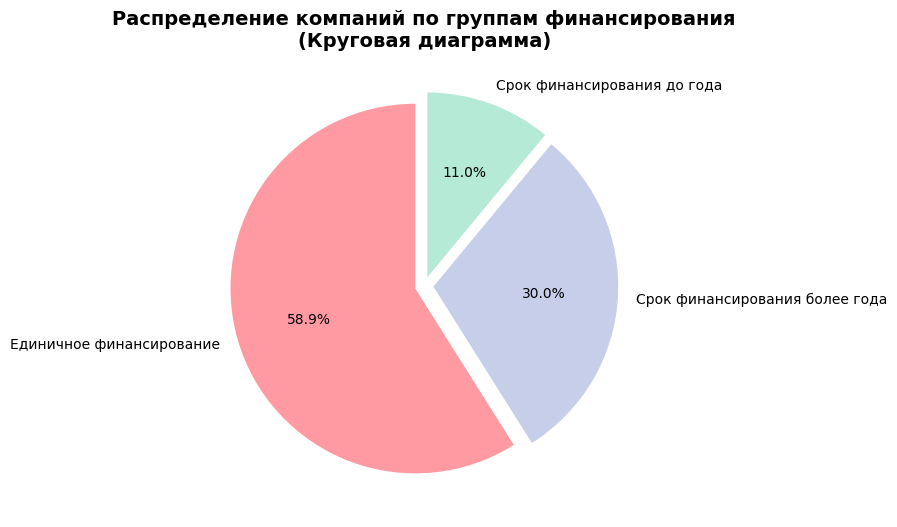

In [57]:
# Создаем фигуру
fig, ax = plt.subplots(figsize=(15, 6))

# Настраиваем цвета
colors = ['#FF9AA2', '#C7CEEA', '#B5EAD7']

# Строим круговую диаграмму
ax.pie(
    group_ratio, 
    labels=group_ratio.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    explode=(0.05, 0.05, 0.05))

# Пишем название диаграммы
ax.set_title('Распределение компаний по группам финансирования\n(Круговая диаграмма)', fontsize=14, fontweight='bold')

**Таким образом, из круговой диаграммы 'Распределение компаний по группам финансирования' можно сделать следующие выводы:**
- Более половины компаний (58.9%) привлекли инвестиции всего один раз. 
- Привлечение инвестиций имеет "воронкообразную" структуру:
  -  Широкий охват групп компаний на уровне первого раунда финансирования, т.е. более половины компаний (58.9%)
  -  Сужеине групп компаний на этапе финансирования до года (30%)
  -  Еще большее сужение групп компаний сроком финансирования более года (11%)

#### Создадим визуализацию процентного соотношения групп по объёму инвестиций, а именно: какую долю от общего объёма привлечённых средств получила каждая групп.

В начале подсчитаем долю каждой группы от общей суммы объема инвестиций для каждой группы в процентах.

In [58]:
# Группируем данные и считаем сумму инвестиций для каждой группы
investment_group = cb_investments_data.groupby('funding_group')['funding_total_usd'].sum().sort_values(ascending=False)

# Рассчитываем долю каждой группы от общей суммы в процентах
total_investment = investment_group.sum()
investment_share_pct = (investment_group / total_investment) * 100

print('Доля общего объема инвестиций по группам:')
print(investment_share_pct)

Доля общего объема инвестиций по группам:
funding_group
Срок финансирования более года    61.869624
Единичное финансирование          30.619848
Срок финансирования до года        7.510528
Name: funding_total_usd, dtype: float64


Создадим визуализацию.

Text(0.5, 1.0, 'Распределение общего объема инвестиций по группам\n(Круговая диаграмма)')

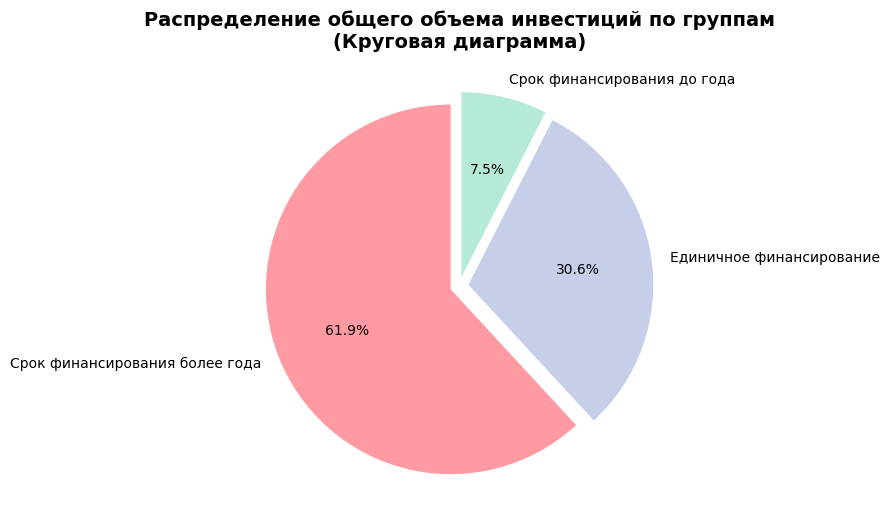

In [59]:
# Создаем фигуру
fig, ax = plt.subplots(figsize=(15, 6))

# Настраиваем цвета для групп
colors = ['#FF9AA2', '#C7CEEA', '#B5EAD7']

# Строим круговую диаграмму
ax.pie(
    investment_share_pct, 
    labels=investment_share_pct.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    explode=(0.05, 0.05, 0.05))

# Пишем название диаграммы
ax.set_title('Распределение общего объема инвестиций по группам\n(Круговая диаграмма)', fontsize=14, fontweight='bold')

#### Промежуточный вывод:
- Меньшинство владеет большинством капитала
- Проведенный анализ выявил значительный дисбаланс по распределению общего объема привлеченных инвестиций по группам компаний по срокам финансирования:
  - Группа "Срок финансирования более года" (30% компаний) привлекает 61.9% всех инвестиций
  - Группа "Единичное финансирование" (58.9% компаний) получает только 30.6% инвестиций
  - Группа "Срок финансирования до года" (11% компаний) получает всего 7.5% инвестиций

### <a id='part2.2'>2.2. Выделение средних и нишевых сегментов рынка</a>

[Вернуться к содержанию](#content)

#### Задачи:
- Рассчитать, как часто в датасете встречается каждый из сегментов: 
  - Сегменты, к которым относится более 120 компаний, отнести к массовым, сегменты, в которые входит от 35 до 120 включительно, отнести к средним, а сегменты до 35 компаний отнести к нишевым. 
  - Рассчитать, сколько сегментов попадает в каждую из категорий.
- Построить график распределения количества компаний в сегментах и отобразить на нём разделение на нишевые и средние сегменты.
- Оставить в столбце market только массовые сегменты. Для остальных сегментов заменить значения на заглушки — niche для нишевых и mid для средних.

Посчитаем сколько в данных встречается отрасль компании.

In [60]:
cb_investments_data.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,funding_duration_days,funding_group
0,harvard university,http://harvard.edu,|education|,education,90000000.0,operating,usa,ma,boston,cambridge,1,<NA>,NaT,NaN,NaN,1636,2014-01-06,2014-01-06,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Единичное финансирование
1,university of new brunswick,http://www.unb.ca,unknown,unknown,2000000.0,operating,unknown,unknown,unknown,unknown,1,<NA>,1785-01-01,NaN,NaN,1785,2014-05-15,2014-05-15,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Единичное финансирование
2,dupont,http://www.dupont.com,|business services|agriculture|automotive|inve...,business services,9000000.0,operating,usa,de,"wilmington, delaware",wilmington,1,1,1802-07-19,NaN,NaN,1802,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Единичное финансирование
3,university of michigan,http://www.umich.edu/,|education|,education,7700000.0,operating,usa,mi,detroit,ann arbor,3,0,1817-01-01,NaN,NaN,1817,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347,Срок финансирования до года
4,case western reserve university,http://www.case.edu,|education|,education,540000.0,operating,usa,oh,cleveland,cleveland,1,<NA>,1826-01-01,NaN,NaN,1826,2014-01-14,2014-01-14,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Единичное финансирование


In [61]:
# Считаем частоту каждого сегмента
market_counts = cb_investments_data['market'].value_counts().sort_values(ascending=False)
print(market_counts.head())

market
 software          4190
 biotechnology     3531
unknown            2503
 mobile            1852
 e-commerce        1528
Name: count, dtype: int64


Создадим классификацию ссегментов по количеству компаний, которые встречаются в каждой отрасли, где:
- более 120 компаний - массовый сегмент
- от 35 до 120 включительно компаний - средний сегмент
- до 35 компаний - нишевый сегмент.

In [62]:
# Создаем DataFrame
segments = market_counts.rename_axis('segment').reset_index(name='count')

# Функция для классификации сегментов
def classify_segment(count):
    if count > 120:
        return 'Массовый'  
    elif 35 <= count <= 120:
        return 'Средний'      
    else:
        return 'Нишевый'

segments['category'] = segments['count'].apply(classify_segment)

# Считаем компании
category_stats = segments.groupby('category').agg(
    segment_count=('segment', 'count'),
    company_count=('count', 'sum'),
).sort_values('segment_count', ascending=False)

print(category_stats)

          segment_count  company_count
category                              
Нишевый             714           2494
Средний              81           5067
Массовый             54          33343


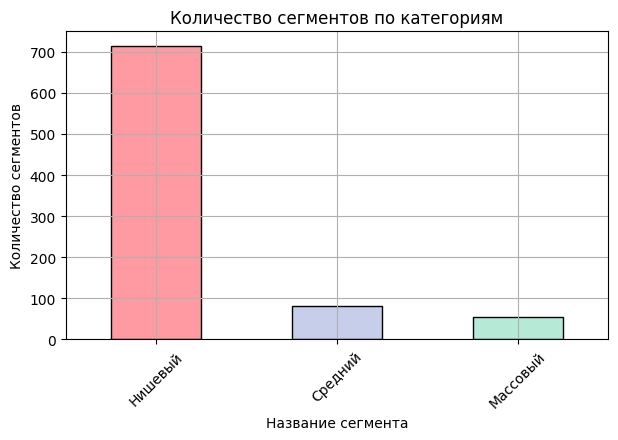

In [63]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# Настраиваем цвета
colors = ['#FF9AA2', '#C7CEEA', '#B5EAD7']

# создаем столбчатую диаграмму для визуализации данных
category_stats['segment_count'].plot(
    kind='bar',
    ax=ax,
    color=colors,
    legend=False,
    rot=45,
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Количество сегментов по категориям')
ax.set_xlabel('Название сегмента')
ax.set_ylabel('Количество сегментов')
ax.grid(True)

plt.show()

In [64]:
# Создаем словарь для замены сегментов
replace_dict = {}

# Заполняем словарь
for i, row in segments.iterrows():
    if row['category'] == 'Массовый':
        replace_dict[row['segment']] = row['segment']
    elif row['category'] == 'Средний':
        replace_dict[row['segment']] = 'mid'
    else:
        replace_dict[row['segment']] = 'niche'

# Применяем замену к исходному датасету
cb_investments_data['market'] = cb_investments_data['market'].map(replace_dict)

In [65]:
# Выведем первые строки датасета
cb_investments_data.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,funding_duration_days,funding_group
0,harvard university,http://harvard.edu,|education|,education,90000000.0,operating,usa,ma,boston,cambridge,1,<NA>,NaT,NaN,NaN,1636,2014-01-06,2014-01-06,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Единичное финансирование
1,university of new brunswick,http://www.unb.ca,unknown,unknown,2000000.0,operating,unknown,unknown,unknown,unknown,1,<NA>,1785-01-01,NaN,NaN,1785,2014-05-15,2014-05-15,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Единичное финансирование
2,dupont,http://www.dupont.com,|business services|agriculture|automotive|inve...,mid,9000000.0,operating,usa,de,"wilmington, delaware",wilmington,1,1,1802-07-19,NaN,NaN,1802,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Единичное финансирование
3,university of michigan,http://www.umich.edu/,|education|,education,7700000.0,operating,usa,mi,detroit,ann arbor,3,0,1817-01-01,NaN,NaN,1817,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,347,Срок финансирования до года
4,case western reserve university,http://www.case.edu,|education|,education,540000.0,operating,usa,oh,cleveland,cleveland,1,<NA>,1826-01-01,NaN,NaN,1826,2014-01-14,2014-01-14,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Единичное финансирование


Как можно увидеть, значение 'unknown' было отнесено к массовому сегменту, поскольку превышает порог 120 компаний. Между тем, это не рыночный сегмент, а значение-индикатор, которое говорит об отсутствии данных.

#### Промежуточный вывод:
- распределения количества компаний в сегментах:
  - Массовые сегменты (54 шт.) - 33343 компании
    -  Характеризуются высокой концентрацией компаний (более 120 компаний на сегмент)
  - Средние сегменты (81 шт.) - 5067 компаний
    - Умеренная представленность (35-120 компаний на сегмент)
  - Нишевые сегменты (714 шт.) - 2,494 компании
    - Малая представленность (менее 35 компаний на сегмент)

## <a id='part3'>Часть 3. Работа с выбросами и анализ</a>

### <a id='part3.1'>3.1. Анализируем и помечаем выбросы в каждом из сегментов</a>

[Вернуться к содержанию](#content)

#### Задачи:
- По предобработанному столбцу funding_total_usd графическим образом оценить, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. 
- Укажите интервал, в котором лежат типичные значения.
- Определите сегменты рынка с наибольшей долей компаний, получивших аномальное финансирование, и выведите топ таких сегментов.

Выведем основные числовые показатели столбца 'funding_total_usd' (общий объём привлечённых инвестиций в долларах США)

In [66]:
cb_investments_data['funding_total_usd'].describe()

count    4.090400e+04
mean     1.591285e+07
std      1.686850e+08
min      1.000000e+00
25%      3.500000e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64

Создадим новый столбец 'funding_total_millions', в котором переведем значения столбца 'funding_total_usd' в миллионы долларов, т.е. разделим значения столбца 'funding_total_usd' на 1 миллион.

In [67]:
cb_investments_data['funding_total_millions'] = cb_investments_data['funding_total_usd'] / 1000000

In [68]:
cb_investments_data['funding_total_millions'].describe()

count    40904.000000
mean        15.912854
std        168.684967
min          0.000001
25%          0.350000
50%          2.000000
75%         10.000000
max      30079.503000
Name: funding_total_millions, dtype: float64

Узнаем какое значение имеет 1 процентиль и 99 процентиль.

In [69]:
# Считаем 1 процентиль
min_1_percent = cb_investments_data['funding_total_millions'].quantile(0.01)
print(f"1 процентиль составляет: {min_1_percent}")

median_50_percent = cb_investments_data['funding_total_millions'].quantile(0.5)
print(f"50 процентиль составляет: {median_50_percent}")

# Считаем 99 процентиль
max_1_percent = cb_investments_data['funding_total_millions'].quantile(0.99)
print(f"99 процентиль составляет: {max_1_percent}")

1 процентиль составляет: 0.01
50 процентиль составляет: 2.0
99 процентиль составляет: 200.0


Сделаем визуализацию распределения объёма привлечённых инвестиций, с целью оценить, какой размер общего финансирования для одной компании будет типичным, а какой - выбивающимся.

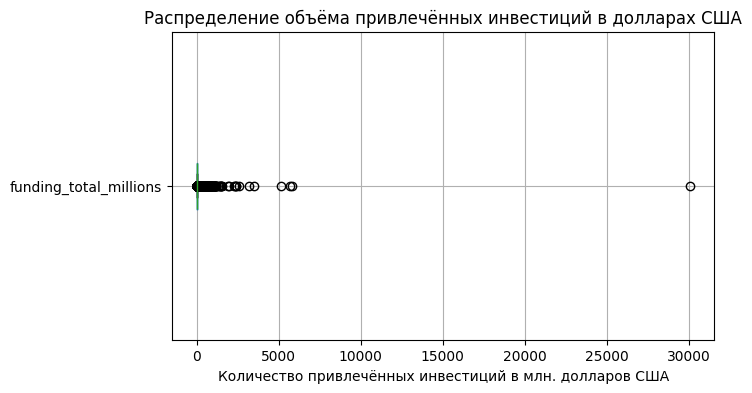

In [70]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# Строим диаграмму размаха методом boxplot()
cb_investments_data.boxplot(
    column='funding_total_millions',
    ax=ax,
    vert=False, 
)

# Добавляем заголовок и метку оси X
ax.set_title('Распределение объёма привлечённых инвестиций в долларах США')
ax.set_xlabel('Количество привлечённых инвестиций в млн. долларов США')

plt.show()

**По основным числовым показателям столбца 'funding_total_millions' можно сделать следующие выводы:**
- Медиана (2 млн. долларов США) значительно меньше среднего (15.9 млн. долларов США), что означает, что данные имеют сильно правостороннее смещение
- Распределение объёма привлечённых инвестиций:
  - 25% компаний получают менее 0.35 млн. долларов США (350 тыс. долларов США)
  - 50% компаний получают менее 2 млн. долларов США
  - 75% компаний получают более 10 млн. долларов США
- Аномальные значения искажают общую картину:
  - Максимум: 30079.5 млн. долларов США
  - Стандартное отклонение (168.68 млн. долларов США)
- Только 1% компаний получают свыше 200 млн. долларов США (при этом максимальное значение 30079 млн. долларов США)

Создадим столбец для выбросов.

In [71]:
# Создаем столбец для выбросов
cb_investments_data['is_outlier'] = False

Посчитаем для каждого рынка выбросы

In [72]:
# Берем все уникальные рынки
markets = cb_investments_data['market'].unique()

# Для каждого рынка считаем выбросы
for market in markets:
    market_data = cb_investments_data[cb_investments_data['market'] == market]
    
    # Считаем квартили
    Q1 = market_data['funding_total_usd'].quantile(0.25)
    Q3 = market_data['funding_total_usd'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Границы для выбросов
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Находим индексы строк этого рынка
    idx = market_data.index
    
    # Отмечаем выбросы
    for i in idx:
        value = cb_investments_data.loc[i, 'funding_total_usd']
        if value < lower or value > upper:
            cb_investments_data.loc[i, 'is_outlier'] = True
            
# Считаем общую статистику
total = len(cb_investments_data)
outliers_count = cb_investments_data['is_outlier'].sum()
print(f"Всего компаний: {total}")
print(f"Выбросов: {outliers_count}")
print(f"Доля выбросов: {outliers_count/total:.1%}")
print()

Всего компаний: 40904
Выбросов: 5204
Доля выбросов: 12.7%



Теперь посчитаем для каждого рынка долю выбросов

In [73]:
# Считаем долю выбросов для каждого рынка
results = []

for market in markets:
    # Все компании этого рынка
    market_all = (cb_investments_data['market'] == market).sum()
    
    # Выбросы этого рынка
    market_outliers = ((cb_investments_data['market'] == market) & 
                      (cb_investments_data['is_outlier'] == True)).sum()
    
    if market_all > 0:
        ratio = (market_outliers / market_all) * 100
    else:
        ratio = 0
    
    results.append([market, market_all, market_outliers, ratio])

# Создаем датафрейм
results_df = pd.DataFrame(results, 
                         columns=['market', 'total', 'outliers', 'ratio'])

# Сортируем по доле выбросов
results_df = results_df.sort_values('ratio', ascending=False)

# Выводим топ-10
print("Топ-10 сегментов по доле выбросов:")
print(results_df.head(10).to_string(index=False))

Топ-10 сегментов по доле выбросов:
           market  total  outliers     ratio
     real estate     251        45 17.928287
      technology     229        37 16.157205
          search     242        39 16.115702
         software    137        22 16.058394
   entertainment     137        22 16.058394
 cloud computing     131        21 16.030534
        big data     140        22 15.714286
            saas     224        35 15.625000
      e-commerce     129        20 15.503876
          travel     293        45 15.358362


#### Промежуточный вывод:
- На основе анализа 40904 компаний методом IQR выявлено, что 5,204 компании (12.7%) получили аномальный объём финансирования, значительно отличающийся от типичного для их сегмента рынка.
- Наибольшая доля выбросов (топ-5) наблюдается в следующих сегментах:
  - Real Estate (недвижимость) - 17.9% компаний получили аномальное финансирование
  - Technology (технологии) - 16.2%
  - Search (поисковые технологии) - 16.1%
  - software (программное обеспечение) - 16.05%
  - Entertainment(сегмент развлечений) - 16.03%

### <a id='part3.2'>3.2. Определяем границы рассматриваемого периода, отбрасываем аномалии</a>

[Вернуться к содержанию](#content)

#### Задачи:
- Проверить по датасету, можно ли считать, что вам предоставили полные данные за 2014 год. 
- Исключить из датасета компании, которые вы ранее посчитали получившими аномальное финансирование.

Создадим столбец 'year'.

In [74]:
# Cделаем год из даты
cb_investments_data['year'] = pd.to_datetime(cb_investments_data['mid_funding_at']).dt.year

Посмотрим сколько в датасете встречается строк, в которых есть 2014 год.

In [75]:
# Смотрим строки за 2014 год
data_2014 = cb_investments_data[cb_investments_data['year'] == 2014].copy()

print(f"Всего строк в данных: {len(cb_investments_data)}")
print(f"Строк за 2014 год: {len(data_2014)}")

Всего строк в данных: 40904
Строк за 2014 год: 6619


In [76]:
# Проверяем покрытие месяцев
data_2014['funding_month'] = data_2014['mid_funding_at'].dt.month
months_present = sorted(data_2014['funding_month'].unique())
    
print(f"Месяцы 2014 года, представленные в данных: {months_present}")
print(f"Всего месяцев с данными: {len(months_present)} из 12")

Месяцы 2014 года, представленные в данных: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]
Всего месяцев с данными: 12 из 12


Таким образом, данные за 2014 год можно считать полными по следующим причинам:
- Присутствуют все 12 месяцев года (с января по декабрь)
- Объём данных значительный - 6,619 записей за 2014 год

Исключим из датасета компании, которые получили аномальное финансирование.

In [77]:
# Убираем аномалии
normal_data = cb_investments_data[cb_investments_data['is_outlier'] == False].copy()

print(f"Было компаний: {len(cb_investments_data)}")
print(f"Стало после удаления аномалий: {len(normal_data)}")
print(f"Удалили: {len(cb_investments_data) - len(normal_data)}")
print()

Было компаний: 40904
Стало после удаления аномалий: 35700
Удалили: 5204



В начале посчитаем сколько раундов финансирования было в каждом году.

In [78]:
year_counts = {}

# Проходим по всем строкам и считаем
for i in range(len(normal_data)):
    year = normal_data.iloc[i]['year']
    rounds = normal_data.iloc[i]['funding_rounds']
       
    if year not in year_counts:
        year_counts[year] = 0
    
    year_counts[year] += rounds

print("Раундов финансирования по годам:")
for year in sorted(year_counts.keys()):
    print(f"{year}: {year_counts[year]} раундов")

Раундов финансирования по годам:
1921: 1 раундов
1960: 2 раундов
1979: 1 раундов
1982: 3 раундов
1983: 1 раундов
1984: 2 раундов
1985: 3 раундов
1987: 2 раундов
1989: 1 раундов
1990: 1 раундов
1992: 5 раундов
1993: 1 раундов
1994: 4 раундов
1995: 9 раундов
1996: 8 раундов
1997: 9 раундов
1998: 15 раундов
1999: 43 раундов
2000: 117 раундов
2001: 66 раундов
2002: 96 раундов
2003: 129 раундов
2004: 172 раундов
2005: 943 раундов
2006: 1852 раундов
2007: 2842 раундов
2008: 3671 раундов
2009: 4647 раундов
2010: 6146 раундов
2011: 7577 раундов
2012: 9703 раундов
2013: 12907 раундов
2014: 7146 раундов


Теперь оставим только компании, которые получали финансирование в годы, когда было зафиксировано 50 или более раундов финансирования

In [79]:
# Находим годы где было зафиксировано 50 или более раундов финансирования
years_with_50_rounds = []
for year, count in year_counts.items():
    if count >= 50:
        years_with_50_rounds.append(year)

print(f"Годы, где было зафиксировано 50 или более раундов финансирования: {years_with_50_rounds}")

Годы, где было зафиксировано 50 или более раундов финансирования: [np.int32(2014), np.int32(2009), np.int32(2013), np.int32(2007), np.int32(2012), np.int32(2010), np.int32(2008), np.int32(2011), np.int32(2005), np.int32(2004), np.int32(2006), np.int32(2001), np.int32(2002), np.int32(2000), np.int32(2003)]


In [80]:
# Фильтруем данные
final_data = normal_data[normal_data['year'].isin(years_with_50_rounds)].copy()

print(f"После фильтрации осталось компаний: {len(final_data)}")

# Проверяем результат
print(f"Исходно: {len(cb_investments_data)} компаний")
print(f"Без аномалий: {len(normal_data)} компаний") 
print(f"После фильтрации по годам: {len(final_data)} компаний")

После фильтрации осталось компаний: 35625
Исходно: 40904 компаний
Без аномалий: 35700 компаний
После фильтрации по годам: 35625 компаний


#### Промежуточный вывод:
- Было произведено удаление аномалий:
  - Было исключено 5204 компании, которые получили аномальное финансирование.
  - Осталось 35700 компаний с типичным для их сегментов объёмом финансирования.
- Было проанализировано количество раундов финансирования по годам. Наиболее активными периодами были:
  - 2013 - 12907 раундов (пик активности)
  - 2012 - 9703 раундов
  - 2011 - 7577 раундов
  - 2014 - 7146 раундов
- Для дальнейшего анализа отобраны годы, в которых было зафиксировано 50 и более раундов финансирования. Такими годами оказались: 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014
- После всех фильтраций осталось 35591 компания

### <a id='part3.3'>3.3. Анализ типов финансирования по объёму и популярности</a>

[Вернуться к содержанию](#content)

#### Задачи:
- Построить график, который покажет, какие типы финансирования в сумме привлекли больше всего денег. 
- Построить график, который покажет популярность разных типов финансирования — какие типы финансирования чаще всего используются компаниями, то есть встречаются в датасете наибольшее количество раз.
- Сравнить графики и выделите часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами, и наоборот — те, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм.
- Построить график суммарных объёмов возвратов от разных типов финансирования за весь период на основе дополнительного датасета.

Напишем функцию для форматирования сумм.

In [81]:
# Функция для красивого вывода
def format_money(value):
    if value >= 1e12:  # триллионы
        return f"${value/1e12:,.1f} трлн"
    elif value >= 1e9:  # миллиарды
        return f"${value/1e9:,.1f} млрд"
    elif value >= 1e6:  # миллионы
        return f"${value/1e6:,.1f} млн"
    elif value >= 1e3:  # тысячи
        return f"${value/1e3:,.1f} тыс"
    else:
        return f"${value:,.0f}"

Выясним, какие типы финансирования в сумме привлекли больше всего денег. 

In [82]:
# Определяем список столбцов с типами финансирования
types = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed',
         'convertible_note', 'debt_financing', 'angel', 'grant',
         'private_equity', 'post_ipo_equity', 'post_ipo_debt',
         'secondary_market', 'product_crowdfunding']

# Суммируем по каждому типу
total_money = final_data[types].agg('sum').sort_values(ascending=False)
print("Какие типы финансирования в сумме привлекли больше всего денег:")
for i, (t, v) in enumerate(total_money.items(), 1):
    print(f"{i}. {t}: {format_money(v)}")

Какие типы финансирования в сумме привлекли больше всего денег:
1. venture: $128.8 млрд
2. seed: $9.5 млрд
3. debt_financing: $8.1 млрд
4. private_equity: $4.7 млрд
5. angel: $2.5 млрд
6. undisclosed: $2.1 млрд
7. post_ipo_equity: $1.9 млрд
8. grant: $1.9 млрд
9. convertible_note: $563.0 млн
10. post_ipo_debt: $286.8 млн
11. equity_crowdfunding: $238.0 млн
12. product_crowdfunding: $183.8 млн
13. secondary_market: $45.3 млн


Построим график.

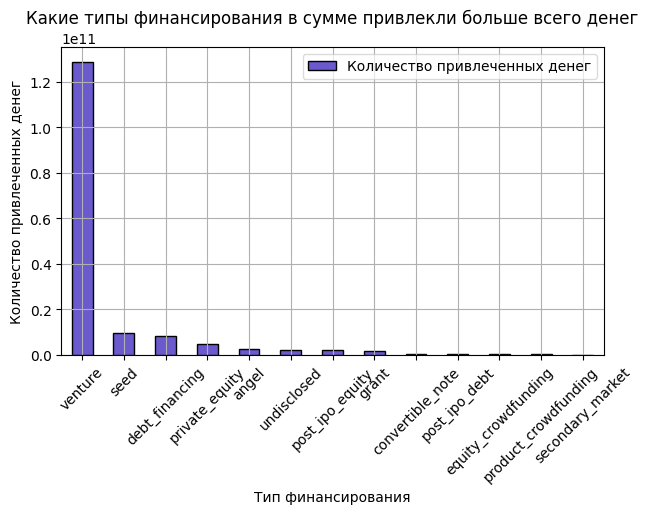

In [83]:
# Создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# Создаем столбчатую диаграмму для визуализации данных
total_money.plot(
    kind='bar',
    ax=ax,
    legend=False,
    rot=45,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Какие типы финансирования в сумме привлекли больше всего денег')
ax.set_xlabel('Тип финансирования')
ax.set_ylabel('Количество привлеченных денег')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(labels=['Количество привлеченных денег'], framealpha=0.7, loc='upper right')

plt.show()

Выясним популярность разных типов финансирования - какие типы финансирования чаще всего используются компаниями, то есть встречаются в датасете наибольшее количество раз.

In [84]:
# Считаем популярность типов финансирования
popularity = (final_data[types] > 0).agg('sum').sort_values(ascending=False)

print("Популярность разных типов финансирования:")
print(popularity)

Популярность разных типов финансирования:
venture                 18860
seed                    13390
debt_financing           3261
angel                    2943
grant                    1001
undisclosed               814
private_equity            630
convertible_note          520
equity_crowdfunding       515
product_crowdfunding      204
post_ipo_equity           165
post_ipo_debt              28
secondary_market            7
dtype: int64


Построим график.

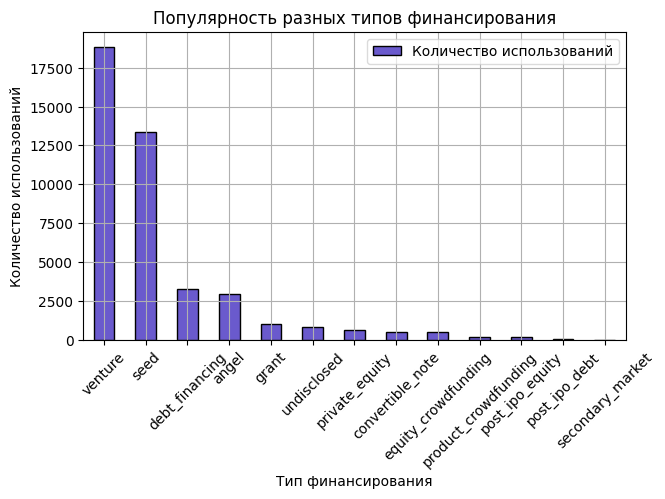

In [85]:
# Создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# Создаем столбчатую диаграмму для визуализации данных
popularity.plot(
    kind='bar',
    ax=ax,
    legend=False,
    rot=45,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Популярность разных типов финансирования')
ax.set_xlabel('Тип финансирования')
ax.set_ylabel('Количество использований')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(labels=['Количество использований'], framealpha=0.7, loc='upper right')

plt.show()

Выясним суммарный объём возвратов от разных типов финансирования за весь период на основе дополнительного датасета cb_returns.

In [86]:
# Используем agg для суммирования по каждому типу
total_returns = cb_returns[types].agg('sum').sort_values(ascending=False)
print('Суммарные объёмы возвратов по типам финансирования за весь период:')
print(total_returns)

Суммарные объёмы возвратов по типам финансирования за весь период:
venture                 40578.62
debt_financing           4734.85
private_equity           3587.33
seed                     2382.24
angel                    1509.23
post_ipo_equity          1104.96
undisclosed               730.88
post_ipo_debt              91.03
convertible_note           34.79
secondary_market            5.20
equity_crowdfunding         3.83
product_crowdfunding        1.86
grant                       0.00
dtype: float64


Построим график.

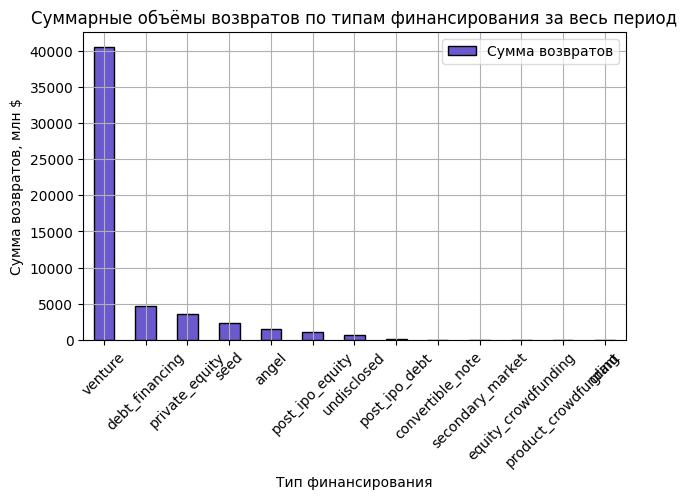

In [87]:
#создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(7, 4))

# создаем столбчатую диаграмму для визуализации данных
total_returns.plot(
    kind='bar',
    ax=ax,
    legend=False,
    rot=45,
    color='slateblue',
    edgecolor='black'
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Суммарные объёмы возвратов по типам финансирования за весь период')
ax.set_xlabel('Тип финансирования')
ax.set_ylabel('Сумма возвратов, млн $')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(labels=['Сумма возвратов'], framealpha=0.7, loc='upper right')

plt.show()

### Промежуточный вывод:
- venture и seed формируют основу финансирования 
- venture - абсолютный лидер по всем показателям: самый большой объем (128.8 млрд. долларов США), самая высокая популярность (18,860 компаний), самые высокие возвраты (40.6 млрд. долларов США).
- seed - второй по важности: высокая популярность (13,390 компаний), значительный объем (9.5 млрд. долларов США), хорошие возвраты (2.4 млрд. долларов США).

## <a id='part4'>Часть 4. Анализ динамики</a>

### <a id='part4.1'>4.1. Динамика предоставления финансирования по годам</a>

[Вернуться к содержанию](#content)

#### Задачи:
- Используя столбцы funding_total_usd и funding_rounds, для каждой компании рассчитать средний объём одного раунда финансирования.
- На основе получившейся таблицы построить графики, которые отразят:
  - динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования;
  - динамику общего количества раундов за каждый год, то есть насколько активно происходили инвестиции на рынке (чем больше раундов, тем выше активность).
- На основе полученных данных ответить на вопросы:
  - В каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?
  - Какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?

Рассчитаем средний объём одного раунда финансирования для каждой компании, используя столбцы funding_total_usd и funding_rounds.

In [88]:
# Рассчитываем средний объём одного раунда для каждой компании
final_data['avg_round_amount'] = final_data['funding_total_usd'] / final_data['funding_rounds']

Рассчитаем медиану, среднее значение, количество раундов финансирования за каждый год.

In [89]:
# Группируем по годам
yearly_stats = final_data.groupby('year').agg(
    avg_round_median=('avg_round_amount', 'median'), # Медиана
    total_rounds=('funding_rounds', 'sum'), # Сумма всех раундов
).reset_index()

In [90]:
# Сортируем по годам (теперь столбец точно называется 'year')
yearly_stats = yearly_stats.sort_values('year')

In [91]:
# Выводим статистику
print("Статистика по годам:")
for i, row in yearly_stats.iterrows():
    print(f"\n{int(row['year'])} год:")
    print(f"Медиана раунда: ${row['avg_round_median']:,.0f}")
    print(f"Всего раундов: {row['total_rounds']:,.0f}")

Статистика по годам:

2000 год:
Медиана раунда: $2,260,234
Всего раундов: 117

2001 год:
Медиана раунда: $1,570,886
Всего раундов: 66

2002 год:
Медиана раунда: $2,833,333
Всего раундов: 96

2003 год:
Медиана раунда: $1,510,000
Всего раундов: 129

2004 год:
Медиана раунда: $2,775,000
Всего раундов: 172

2005 год:
Медиана раунда: $4,500,000
Всего раундов: 943

2006 год:
Медиана раунда: $3,850,000
Всего раундов: 1,852

2007 год:
Медиана раунда: $2,875,000
Всего раундов: 2,842

2008 год:
Медиана раунда: $2,170,744
Всего раундов: 3,671

2009 год:
Медиана раунда: $1,500,000
Всего раундов: 4,647

2010 год:
Медиана раунда: $1,250,000
Всего раундов: 6,146

2011 год:
Медиана раунда: $871,500
Всего раундов: 7,577

2012 год:
Медиана раунда: $687,500
Всего раундов: 9,703

2013 год:
Медиана раунда: $560,000
Всего раундов: 12,907

2014 год:
Медиана раунда: $573,517
Всего раундов: 7,146


Создадим график, который покажет динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

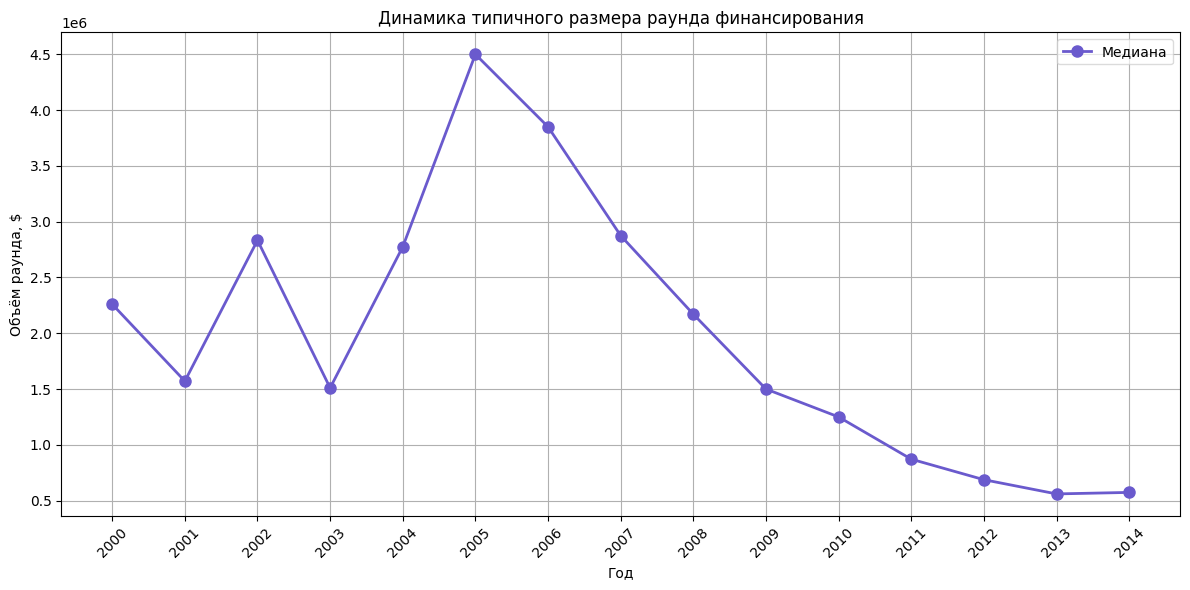

In [92]:
# Динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования
fig, ax = plt.subplots(figsize=(12, 6))

# Преобразуем в списки Python
x_list = yearly_stats['year'].tolist()
y_list = yearly_stats['avg_round_median'].tolist()

# Создаем линейный график для медианы
ax.plot(x_list, 
        y_list,
        marker='o', linewidth=2, markersize=8,
        color='slateblue', label='Медиана')

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Динамика типичного размера раунда финансирования')
ax.set_xlabel('Год')
ax.set_ylabel('Объём раунда, $')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(framealpha=0.7, loc='upper right')

# Настраиваем подписи на оси X
ax.set_xticks(yearly_stats['year'])
ax.set_xticklabels(yearly_stats['year'], rotation=45)


plt.tight_layout()
plt.show()

Создадим график, показывающий динамику общего количества раундов за каждый год.

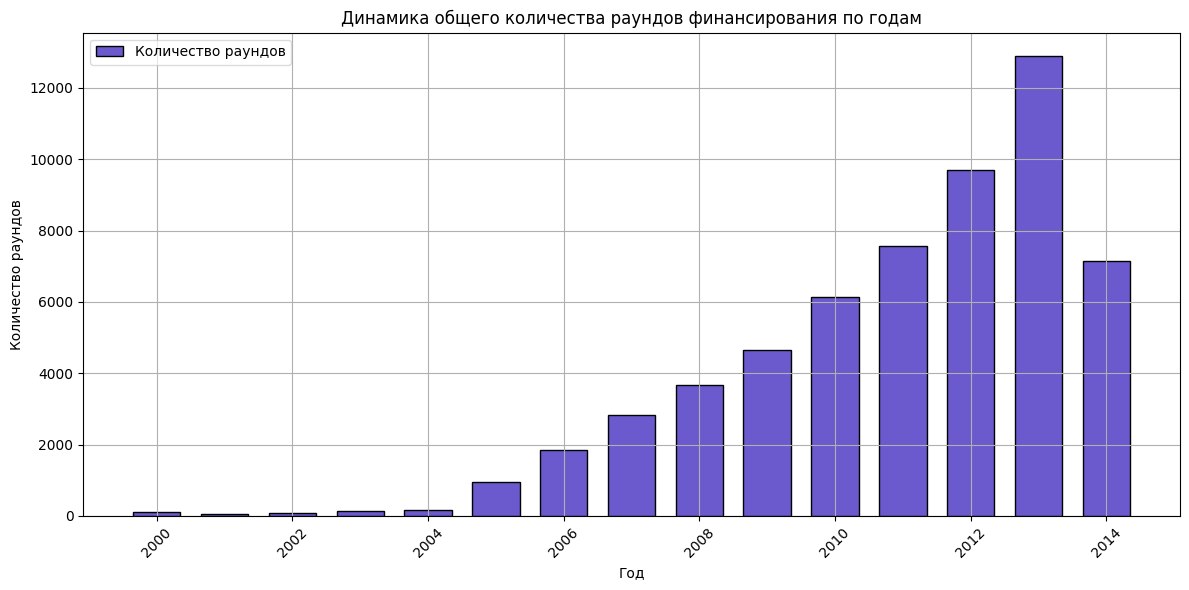

In [93]:
# Динамика общего количества раундов за каждый год
fig, ax = plt.subplots(figsize=(12, 6))

# Создаем столбчатую диаграмму для визуализации данных
ax.bar(
    yearly_stats['year'],
    yearly_stats['total_rounds'],
    color='slateblue',
    edgecolor='black',
    width=0.7
)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Динамика общего количества раундов финансирования по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Количество раундов')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(labels=['Количество раундов'], framealpha=0.7, loc='upper left')

# Поворачиваем подписи на оси X
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Промежуточный вывод:
- 2005 год стал пиковым по медианному размеру раунда финансирования - 4 500 000 долларов США. Это означает, что в 2005 году половина всех раундов финансирования составляла сумму от 4.5 млн. долларов США и выше.
- В 2014 году наблюдались следующие изменения по сравнению с 2013 годом:
  - Медианный размер раунда незначительно увеличился с 560 000 долларов США до 573 517 долларов США
  - Общее количество раундов резко сократилось с 12 907 до 7 146

### <a id='part4.2'>4.2. Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов</a>

[Вернуться к содержанию](#content)

#### Задачи:
- Составить сводную таблицу, в которой указывается суммарный размер общего финансирования funding_total_usd по годам и сегментам рынка. Отбрать из неё только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013.
- На графике отразить, как менялся суммарный размер общего финансирования в каждом из отобранных сегментов по годам, за которые у вас достаточно данных. Рассмотреть только массовые сегменты, а средние и нишевые исключите.
- На основе графика сделать вывод о том, какие сегменты показывают наиболее быстрый и уверенный рост.

Создадим сводную таблицу.

In [94]:
# Создаем сводную таблицу
pivot_table = final_data.pivot_table(
    index='year',
    columns='market',
    values='funding_total_usd',
    aggfunc='sum',
    fill_value=0
)

Делаем фильтр, по которому оставим только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013.

In [95]:
if 2013 in pivot_table.index and 2014 in pivot_table.index:
    # Сравниваем значения по сегментам
    year_filter = pivot_table.loc[2014] > pivot_table.loc[2013]
    growth_segments = pivot_table.columns[year_filter].tolist()
    
    print(f"Все сегменты с ростом в 2014 году: {growth_segments}")
    print(f"Количество таких сегментов: {len(growth_segments)}")
else:
    print("В данных нет 2013 или 2014 года")
    growth_segments = []

print()

Все сегменты с ростом в 2014 году: [' apps ', ' cloud computing ', ' entertainment ', ' internet ', ' medical ', ' networking ', ' photography ', ' real estate ', ' startups ', ' technology ', ' video ', 'e-commerce ', 'niche', 'unknown']
Количество таких сегментов: 14



Делаем фильтр, по которому оставляем только массовые сегменты, а средние и нишевые исключаем. Также исключим значение 'unknown'.

In [96]:
# Оставляем только массовые сегменты
mass_growth_segments = []
for segment in growth_segments:
    if segment != 'mid' and segment != 'niche' and segment != 'unknown':
        mass_growth_segments.append(segment)

print(f"Массовые сегменты с ростом: {mass_growth_segments}")
print(f"Количество массовых сегментов с ростом: {len(mass_growth_segments)}")

Массовые сегменты с ростом: [' apps ', ' cloud computing ', ' entertainment ', ' internet ', ' medical ', ' networking ', ' photography ', ' real estate ', ' startups ', ' technology ', ' video ', 'e-commerce ']
Количество массовых сегментов с ростом: 12


Создадим график.

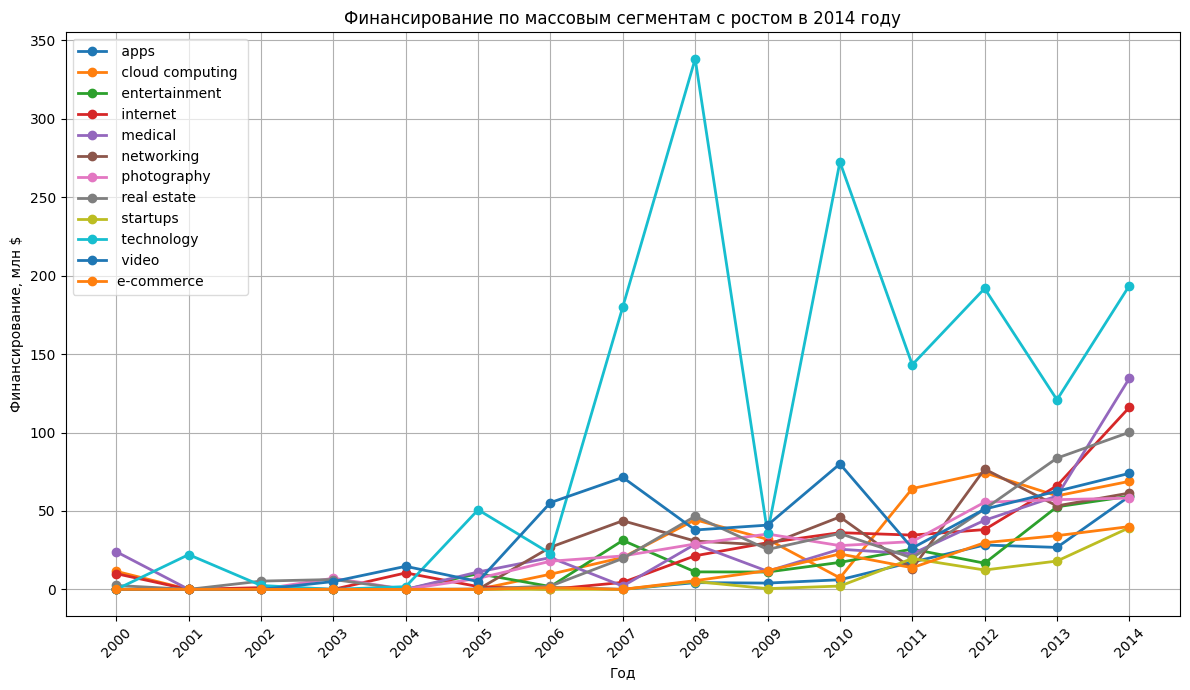

In [97]:
# Создаем график
if mass_growth_segments:
    massive_data = pivot_table.T.loc[mass_growth_segments]
    
    # Создаем фигуру и оси
    fig, ax = plt.subplots(figsize=(12, 7))
    
    for segment in mass_growth_segments:
        years = massive_data.columns
        values = massive_data.loc[segment]
        
        ax.plot(years, values / 1000000, marker='o', linewidth=2, label=segment)

    # Устанавливаем подписи для заголовка, осей x и y
    ax.set_title('Финансирование по массовым сегментам с ростом в 2014 году')
    ax.set_xlabel('Год')
    ax.set_ylabel('Финансирование, млн $')
    ax.grid(True)
    
    # Настраиваем легенду диаграммы
    ax.legend(framealpha=0.7, loc='upper left')

    plt.xticks(massive_data.columns, rotation=45)
    plt.tight_layout()
    plt.show()

### Промежуточный вывод:
- Technology - крупнейший сегмент в выборке по общему финансированию
- Наибольший рост финансирования по графику в 2014г. можно увидеть в сегменте medical
- Также среди лидеров роста финансирования в 2014г. можно выделить сегмент Internet и Apps.

### <a id='part4.3'>4.3. Годовая динамика доли возвращённых средств по типам финансирования</a>

[Вернуться к содержанию](#content)

#### Задачи:
- Для каждого года и каждого вида финансирования рассчитать нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных. При этом слишком большие аномальные значения, то есть неадекватные выбросы, нужно заменить на пропуски.
- Построить график, на котором отобразить нормированные значения возврата средств для типов финансирования venture, debt_financing, private_equity, seed и angel.
- Сделать вывод о том, в каких типах финансирования наблюдается наиболее устойчивый рост показателя.

Посчитаем сумму привлеченных средств.

In [98]:
# Нужные типы финансирования
types = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']

# Рассчет сумм привлеченных средств по годам
invested = final_data.groupby('year')[types].sum() / 1000000  # в млн $

Объеденим датасет final_data c датасетом cb_returns.

In [99]:
# Берем данные о возвратах
returns = cb_returns[['year'] + types]

# Объединяем таблицы
data = pd.merge(returns, invested, on='year')

Посчитаем долю возврата для каждого типа.

In [100]:
# Считаем долю возврата для каждого типа
for t in types:
    # Вычисляем долю возврата
    data[f'{t}_ratio'] = data[f'{t}_x'] / (data[f'{t}_y'] + 1e-60)
    
    # Заменяем аномалии на пропуски
    data.loc[data[f'{t}_ratio'] > 2, f'{t}_ratio'] = None

Создадим таблицу для графика

In [101]:
# Создаем таблицу для графика
ratio_columns = [f'{t}_ratio' for t in types]
ratio_table = data[['year'] + ratio_columns].set_index('year')

print("Доля возвращённых средств:")
print(ratio_table)

Доля возвращённых средств:
      venture_ratio  debt_financing_ratio  private_equity_ratio  seed_ratio  \
year                                                                          
2000       0.172606              0.618571              0.000000    0.996471   
2001       0.107991              0.770258              0.000000    1.079592   
2002       0.682282              0.223388              0.201333    0.629707   
2003       0.570134              1.038095                   NaN    0.505276   
2004       0.922425              0.568930                   NaN    0.552289   
2005       0.551037              0.314087              0.480000    0.674695   
2006       0.345291              0.839535              0.935453    0.817086   
2007       0.301725              0.611765              0.612554    0.369038   
2008       0.191468              0.997404              0.679925    0.296005   
2009       0.169260              0.401243              0.789171    0.563621   
2010       0.201127      

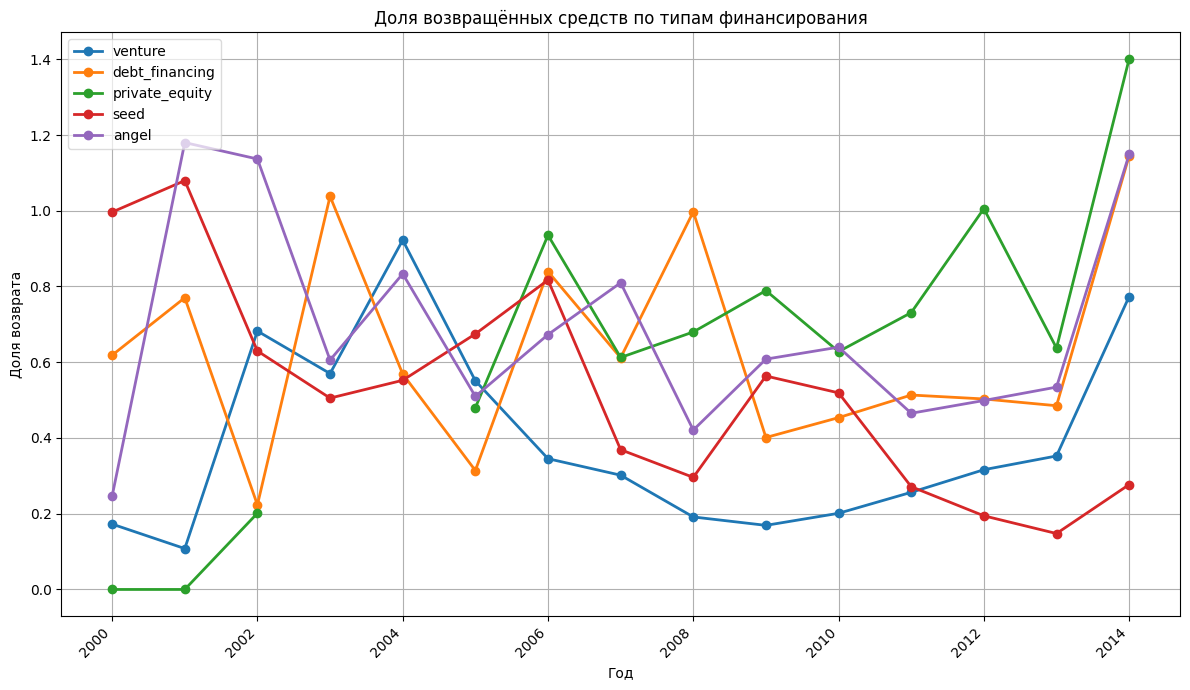

In [102]:
# Создаем фигуру и оси с нужным размером
fig, ax = plt.subplots(figsize=(12, 7))

# Создаем линейный график для каждого типа финансирования
for t in types:
    ax.plot(ratio_table.index, ratio_table[f'{t}_ratio'],
            marker='o', linewidth=2, markersize=6, label=t)

# Устанавливаем подписи для заголовка, осей x и y
ax.set_title('Доля возвращённых средств по типам финансирования')
ax.set_xlabel('Год')
ax.set_ylabel('Доля возврата')
ax.grid(True)

# Настраиваем легенду диаграммы
ax.legend(labels=types, framealpha=0.7, loc='upper left')

# Поворачиваем подписи на оси X
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Промежуточный вывод:
- Наиболее устойчивый рост показателя наблюдается в следующих типах финансирования:
  -  Private Equity - демонстрирует уверенный восходящий тренд в последние три года наблюдения, с максимальным конечным значением среди всех типов (1.4 в 2014 году).
  -  Angel - показывает стабильное восстановление с 2012 года, завершившееся резким скачком в 2014 году до 1.148.
- Private Equity и Angel financing являются наиболее перспективными направлениями с точки зрения растущей эффективности возврата средств. 

## <a id='common_conclusion'>Итоговый вывод и рекомендации</a>

[Вернуться к содержанию](#content)

#### 1. Общий обзор проделанной работы.  
В ходе работы было сделано следующее:
- **Предобработка данных:** преобразование типов данных, обработка пропусков, устранение дубликатов, нормализация данных (приведение к единому регистру).
- **Исследовательский анализ:** изучение групп по срокам финансирования, выделение средних и нишевых сегментов рынка, анализ выбросов в каждом из сегментов рынка, анализ типов финансирования по объёму и популярности, анализ динамики предоставления финансирования по годам, анализ динамики размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов, анализ годовая динамика доли возвращённых средств по типам финансирования
-
- распределения заведений по категориям и районам, анализ сетевого/несетевого соотношения заведений, исследование посадочных мест, рейтингов, корреляций, популярных сетей и ценовой политики.
- **Визуализация результатов:** графическое представление ключевых закономерностей для наглядности выводов.
#### 2. Главные выводы по проведенным исследованиям.  
- Более половины компаний (58.9%) привлекли инвестиции всего один раз. 
- Привлечение инвестиций имеет "воронкообразную" структуру:
  -  Широкий охват групп компаний на уровне первого раунда финансирования, т.е. более половины компаний (58.9%)
  -  Сужеине групп компаний на этапе финансирования до года (30%)
  -  Еще большее сужение групп компаний сроком финансирования более года (11%)
- Меньшинство владеет большинством капитала
- Проведенный анализ выявил значительный дисбаланс по распределению общего объема привлеченных инвестиций по группам компаний по срокам финансирования:
  - Группа "Срок финансирования более года" (30% компаний) привлекает 61.9% всех инвестиций
  - Группа "Единичное финансирование" (58.9% компаний) получает только 30.6% инвестиций
  - Группа "Срок финансирования до года" (11% компаний) получает всего 7.5% инвестиций
- распределения количества компаний в сегментах:
  - Массовые сегменты (54 шт.) - 33343 компании
    -  Характеризуются высокой концентрацией компаний (более 120 компаний на сегмент)
  - Средние сегменты (81 шт.) - 5067 компаний
    - Умеренная представленность (35-120 компаний на сегмент)
  - Нишевые сегменты (714 шт.) - 2,494 компании
    - Малая представленность (менее 35 компаний на сегмент)
- На основе анализа 40904 компаний методом IQR выявлено, что 5,204 компании (12.7%) получили аномальный объём финансирования, значительно отличающийся от типичного для их сегмента рынка.
- Наибольшая доля выбросов (топ-5) наблюдается в следующих сегментах:
  - Real Estate (недвижимость) - 17.9% компаний получили аномальное финансирование
  - Technology (технологии) - 16.2%
  - Search (поисковые технологии) - 16.1%
  - software (программное обеспечение) - 16.05%
  - Entertainment(сегмент развлечений) - 16.03%
- Было проанализировано количество раундов финансирования по годам. Наиболее активными периодами были:
  - 2013 - 12907 раундов (пик активности)
  - 2012 - 9703 раундов
  - 2011 - 7577 раундов
  - 2014 - 7146 раундов
- Для дальнейшего анализа отобраны годы, в которых было зафиксировано 50 и более раундов финансирования. Такими годами оказались: 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, также было исключено 5204 компании, которые получили аномальное финансирование, после всех фильтраций осталось 35591 компания
- venture и seed формируют основу финансирования 
- venture - абсолютный лидер по всем показателям: самый большой объем (128.8 млрд. долларов США), самая высокая популярность (18,860 компаний), самые высокие возвраты (40.6 млрд. долларов США).
- seed - второй по важности: высокая популярность (13,390 компаний), значительный объем (9.5 млрд. долларов США), хорошие возвраты (2.4 млрд. долларов США).
- 2005 год стал пиковым по медианному размеру раунда финансирования - 4 500 000 долларов США. Это означает, что в 2005 году половина всех раундов финансирования составляла сумму от 4.5 млн. долларов США и выше.
- В 2014 году наблюдались следующие изменения по сравнению с 2013 годом:
  - Медианный размер раунда незначительно увеличился с 560 000 долларов США до 573 517 долларов США 
  - Общее количество раундов резко сократилось с 12 907 до 7 146
- Technology - крупнейший сегмент в выборке по общему финансированию
- Наибольший рост финансирования по графику в 2014г. можно увидеть в сегменте medical
- Также среди лидеров роста финансирования в 2014г. можно выделить сегмент Internet и Apps.
- Наиболее устойчивый рост показателя наблюдается в следующих типах финансирования:
  -  Private Equity - демонстрирует уверенный восходящий тренд в последние три года наблюдения, с максимальным конечным значением среди всех типов (1.4 в 2014 году).
  -  Angel - показывает стабильное восстановление с 2012 года, завершившееся резким скачком в 2014 году до 1.148.
- Private Equity и Angel financing являются наиболее перспективными направлениями с точки зрения растущей эффективности возврата средств. 
#### 3. Рекоммендации на основании проведенного анализа данных:
- **В какую отрасль стоит инвестировать?**
  - Медицинский сектор (medical):
    - Обоснование: Демонстрирует экспоненциальный рост (+126% в 2014), при этом не является перегретым сегментом
  - Технологический сектор (technology):
    - Обоснование: Крупнейший по объему ($193.7 млрд), показывает стабильный рост (+60% в 2014)
  - Интернет сектор (Internet):
    -  Обоснование: Устойчивый рост (+76% в 2014), стабильная динамика с 2009 года
- **Какой тип финансирования при этом будет наиболее уместным?**
  - private equity:
    - Обоснование: Показывает максимальную долю возврата (1.40) и устойчивый рост
  - angel:
    - Обоснование: (40.6 млрд возвратов)